In [ ]:
pip install -U empath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57799 sha256=cbe19896b8cbab7ceaf86b53dc785b45d9d93bd565048714b07ee013658fe723
  Stored in directory: /root/.cache/pip/wheels/b5/93/85/f4e8694df404eb214060dd0e0f3fda14398638f5835b3dde23
Successfully built empath


In [ ]:
pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313499 sha256=c711fd4cc8e4a35d024d2e0899d92c05cb61960d54721a2b346b4e5ff697133f
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
pip install -U gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from empath import Empath
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
import spacy
import gensim
from gensim.utils import simple_preprocess
from scipy.sparse import hstack


In [ ]:
df = pd.read_csv("wcpr_mypersonality_train.csv", encoding='latin-1', encoding_errors="ignore")
df_test = pd.read_csv("wcpr_essays.csv", encoding='latin-1', encoding_errors="ignore")


In [ ]:
df.head(n=1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


In [ ]:
df['AM_PM'] = df['DATE'].str.split(' ').str[-1]

In [ ]:
df['AM_PM'] = df['AM_PM'].map({'AM': 0, 'PM': 1})

In [ ]:
cols=['cEXT','cNEU', 'cAGR', 'cCON', 'cOPN']
df[cols] = df[cols].apply(lambda x: x.map({'n': 0, 'y': 1}))
df_test[cols] = df_test[cols].apply(lambda x: x.map({'n': 0, 'y': 1}))

In [ ]:
df.head(n=1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY,AM_PM
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,...,1,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,1.0


In [ ]:
df_test.head(n=1)

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1


In [ ]:
dk=df.drop(['#AUTHID','STATUS','DATE'],axis=1)

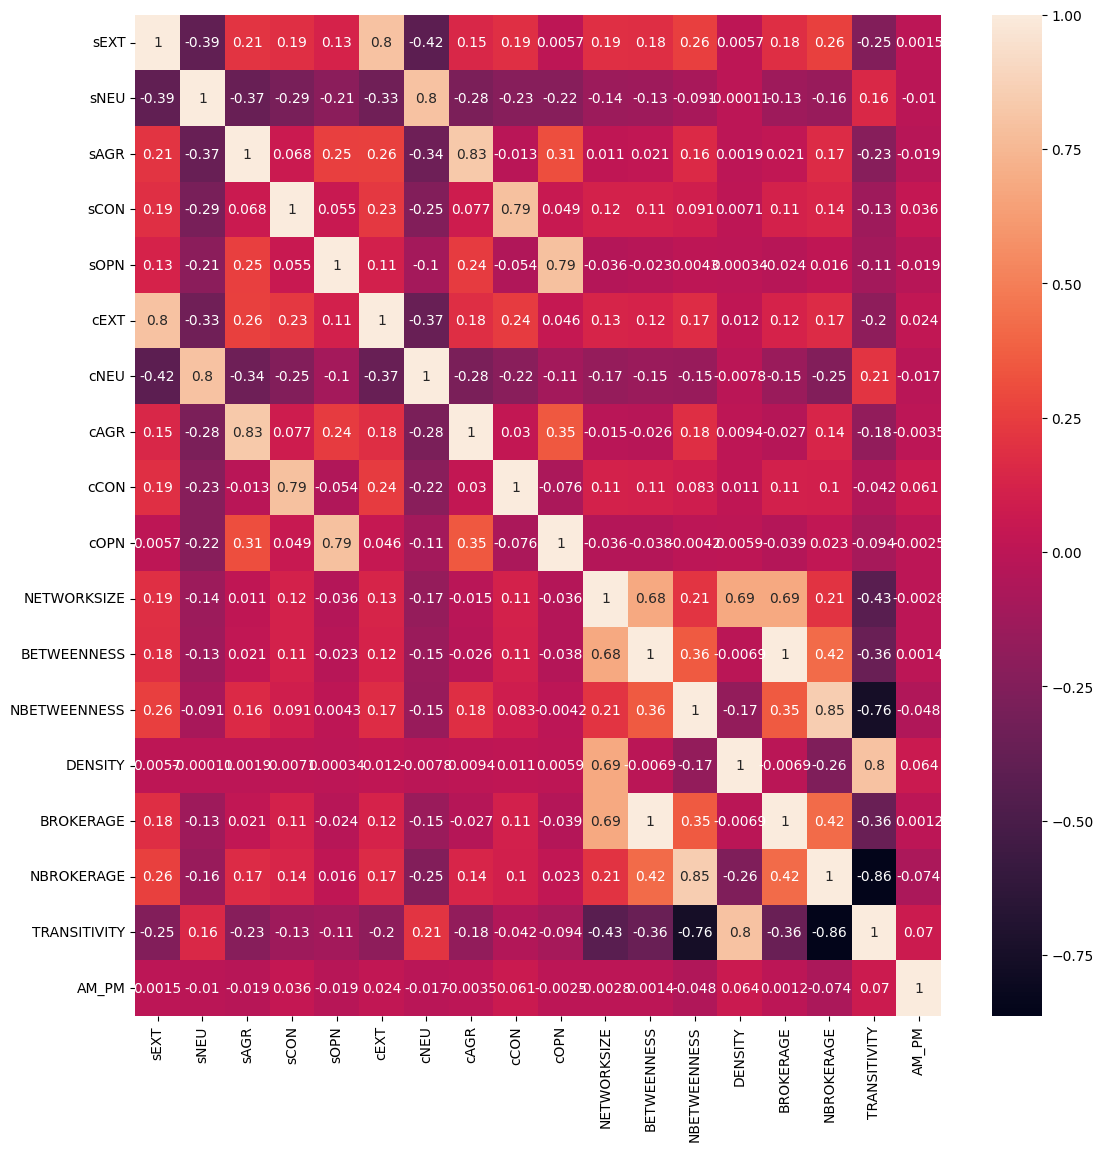

In [ ]:
plt.figure(figsize=(13, 13))  # Adjust the values as needed

sns.heatmap(dk.corr(), annot=True)
plt.show()


In [ ]:
# Simplify the aggregation with mode for all relevant columns
user_df = df.groupby("#AUTHID").agg({
    "STATUS": " ".join,  # Combine all posts into one
    **{col: lambda x: x.mode()[0] for col in ['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN',
                                              'NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']}
}).reset_index()


In [ ]:
user_df.head(n=1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,00419a4c96b32cd63b2c7196da761274,back in cali!!!,1.9,4.15,3.15,4.65,3.45,0,1,0,1,0,141.0,8399.66,86.33,0.07,9196.0,0.47,0.31


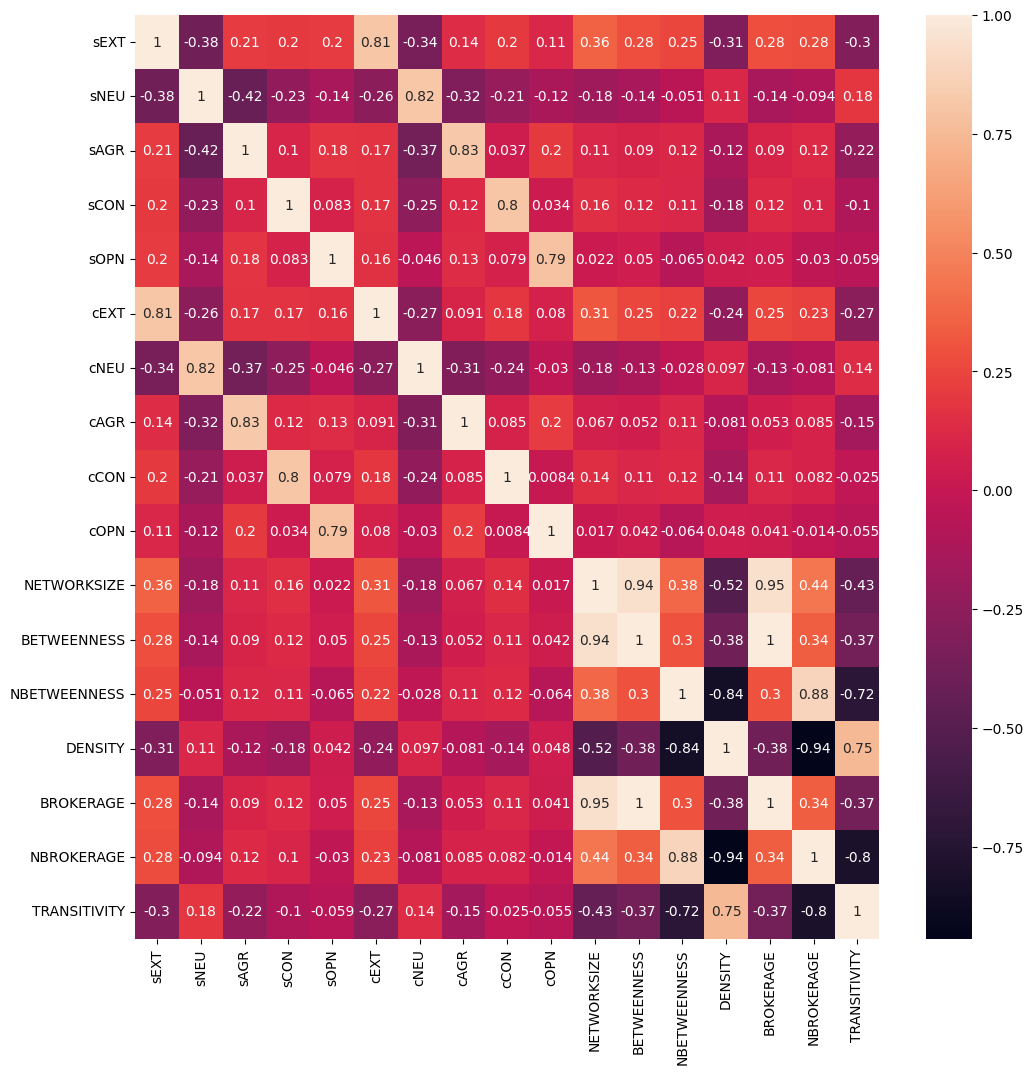

In [ ]:
plt.figure(figsize=(12, 12))  # Adjust the values as needed

sns.heatmap(user_df.drop( ['#AUTHID','STATUS'],axis=1).corr(), annot=True)
plt.show()

In [ ]:
from collections import Counter

counts = Counter(user_df["cNEU"])
print(counts)

Counter({0: 151, 1: 99})


In [ ]:
from collections import Counter

counts = Counter(df["cNEU"])
print(counts)

Counter({0: 6200, 1: 3717})


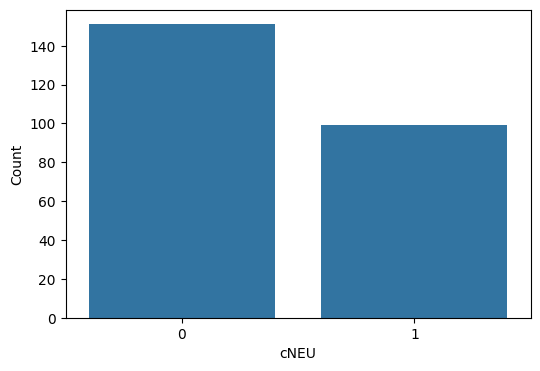

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cNEU', data=user_df)
# Adding title and labels
plt.ylabel("Count")
plt.show()

In [ ]:
X = user_df["STATUS"]
y = user_df["cNEU"]

# Baseline Logistic Regression

Test Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.61      0.63      0.62        30
    Neurotic       0.42      0.40      0.41        20

    accuracy                           0.54        50
   macro avg       0.52      0.52      0.52        50
weighted avg       0.54      0.54      0.54        50



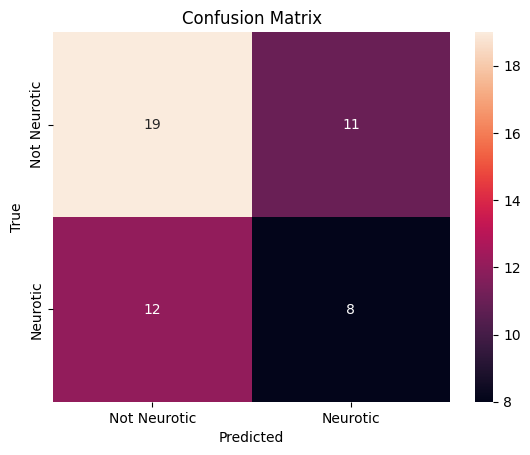

Eval Accuracy: 0.5004051863857374
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.50      0.54      0.52      1235
    Neurotic       0.50      0.46      0.48      1233

    accuracy                           0.50      2468
   macro avg       0.50      0.50      0.50      2468
weighted avg       0.50      0.50      0.50      2468



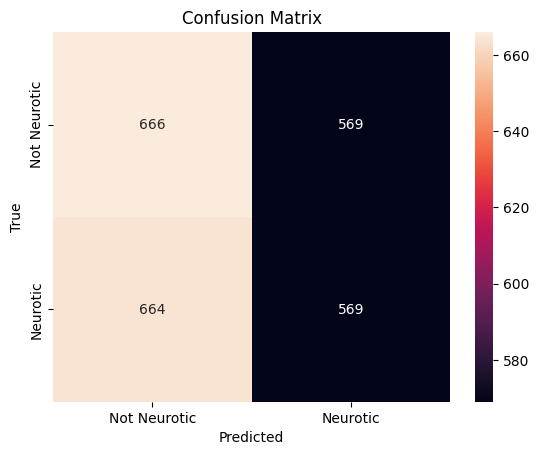

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Vectorization + Logistic Regression Pipeline
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1,2), stop_words="english"),
    LogisticRegression(max_iter=200, class_weight ='balanced')
)

# Train model
pipeline.fit(X_train, y_train)

# Predict and Evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Predict and Evaluate
y_pred = pipeline.predict(df_test['TEXT'])
accuracy = accuracy_score(df_test['cNEU'], y_pred)
print(f"Eval Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(df_test['cNEU'], y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Confusion Matrix
cm = confusion_matrix(df_test['cNEU'], y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Empath + LogisticRegression

In [ ]:
features = lexicon.analyze(text)
features


{'help': 5.0,
 'office': 2.0,
 'dance': 3.0,
 'money': 2.0,
 'wedding': 11.0,
 'domestic_work': 19.0,
 'sleep': 29.0,
 'medical_emergency': 2.0,
 'cold': 9.0,
 'hate': 5.0,
 'cheerfulness': 3.0,
 'aggression': 1.0,
 'occupation': 0.0,
 'envy': 2.0,
 'anticipation': 1.0,
 'family': 14.0,
 'vacation': 16.0,
 'crime': 0.0,
 'attractive': 10.0,
 'masculine': 2.0,
 'prison': 0.0,
 'health': 2.0,
 'pride': 2.0,
 'dispute': 1.0,
 'nervousness': 6.0,
 'government': 0.0,
 'weakness': 0.0,
 'horror': 0.0,
 'swearing_terms': 3.0,
 'leisure': 11.0,
 'suffering': 6.0,
 'royalty': 0.0,
 'wealthy': 1.0,
 'tourism': 1.0,
 'furniture': 10.0,
 'school': 2.0,
 'magic': 0.0,
 'beach': 5.0,
 'journalism': 4.0,
 'morning': 12.0,
 'banking': 1.0,
 'social_media': 2.0,
 'exercise': 1.0,
 'night': 23.0,
 'kill': 4.0,
 'blue_collar_job': 0.0,
 'art': 7.0,
 'ridicule': 0.0,
 'play': 12.0,
 'computer': 2.0,
 'college': 0.0,
 'optimism': 22.0,
 'stealing': 1.0,
 'real_estate': 7.0,
 'home': 24.0,
 'divine': 5.0,
 

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.59      0.63      0.61        30
    Neurotic       0.39      0.35      0.37        20

    accuracy                           0.52        50
   macro avg       0.49      0.49      0.49        50
weighted avg       0.51      0.52      0.52        50



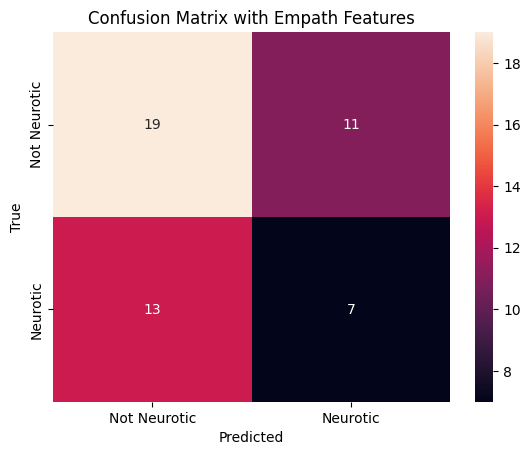

Eval Accuracy: 0.5129659643435981
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.52      0.41      0.46      1235
    Neurotic       0.51      0.62      0.56      1233

    accuracy                           0.51      2468
   macro avg       0.51      0.51      0.51      2468
weighted avg       0.51      0.51      0.51      2468



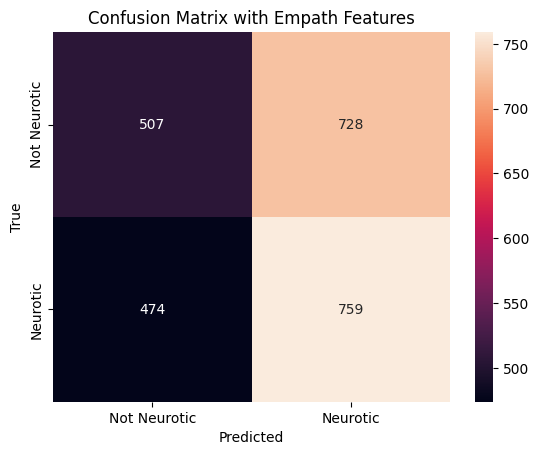

In [ ]:
from empath import Empath

# Initialize Empath lexicon
lexicon = Empath()

# Function to extract Empath categories from a text
def extract_empath_features(text):
    features = lexicon.analyze(text)
    return {category: count for category, count in features.items() if category in ['negative_emotion', 'positive_emotion', 'anxiety','anger','death','hate','eating','politeness']}

# Apply feature extraction to the dataset
X_train_empath = [extract_empath_features(text) for text in X_train]
X_test_empath = [extract_empath_features(text) for text in X_test]
X_eval_empath = [extract_empath_features(text) for text in df_test['TEXT']]

# Convert the dictionary to a DataFrame
import pandas as pd
X_train_empath_df = pd.DataFrame(X_train_empath)
X_test_empath_df = pd.DataFrame(X_test_empath)
X_eval_empath = pd.DataFrame(X_eval_empath)
# Combine with existing text features (e.g., n-grams)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
X_train_text = vectorizer.fit_transform(X_train)
X_test_text = vectorizer.transform(X_test)
X_eval_text = vectorizer.transform(df_test['TEXT'])
# Concatenate text features and Empath features
from scipy.sparse import hstack
X_train_combined = hstack([X_train_text, X_train_empath_df])
X_test_combined = hstack([X_test_text, X_test_empath_df])
X_eval_combined = hstack([X_eval_text, X_eval_empath])
# Train model with combined features
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Neurotic", "Neurotic"]))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix with Empath Features")
plt.show()

y_eval = df_test['cNEU']                                                                   # Predict and evaluate
y_pred = model.predict(X_eval_combined)
accuracy = accuracy_score(y_eval, y_pred)
print(f"Eval Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_eval, y_pred, target_names=["Not Neurotic", "Neurotic"]))
# Confusion matrix
cm = confusion_matrix(y_eval, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix with Empath Features")
plt.show()


# Linear SVM

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'clf__C': 1.0, 'vectorizer__max_df': 0.9, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1), 'vectorizer__stop_words': None}
Best F1 Score (CV): 0.5077589585379495
Test Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.58      0.50      0.54        30
    Neurotic       0.38      0.45      0.41        20

    accuracy                           0.48        50
   macro avg       0.48      0.47      0.47        50
weighted avg       0.50      0.48      0.49        50



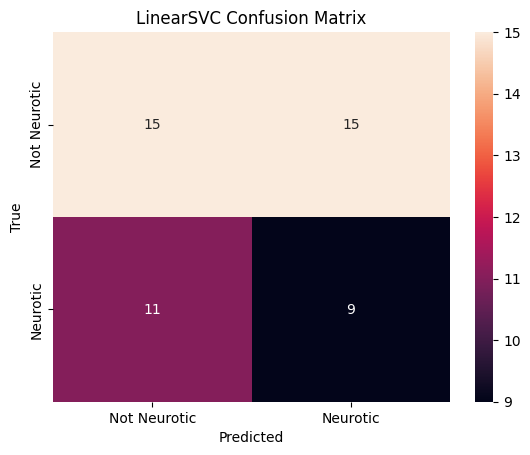

In [ ]:
from sklearn.svm import LinearSVC

# Step 1: Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Step 2: Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', LinearSVC(class_weight='balanced', max_iter=1000))
])

# Step 3: Define parameter grid for tuning
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2),(1,3)],
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__min_df': [1, 2],
    'vectorizer__max_df': [0.85,0.9, 1.0],
    'clf__C': [0.1, 1.0, 10.0]
}

# Step 4: GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Step 5: Evaluate on test set
print("Best Parameters:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)

y_pred = grid.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Step 6: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("LinearSVC Confusion Matrix")
plt.show()


Test Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.58      0.50      0.54        30
    Neurotic       0.38      0.45      0.41        20

    accuracy                           0.48        50
   macro avg       0.48      0.47      0.47        50
weighted avg       0.50      0.48      0.49        50



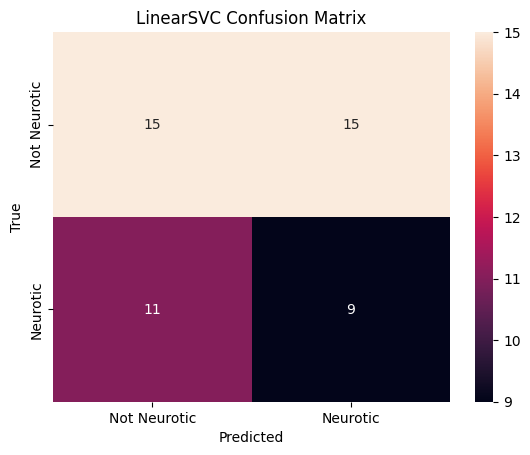

Eval Accuracy: 0.4979740680713128
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.50      0.71      0.58      1235
    Neurotic       0.50      0.29      0.37      1233

    accuracy                           0.50      2468
   macro avg       0.50      0.50      0.48      2468
weighted avg       0.50      0.50      0.48      2468



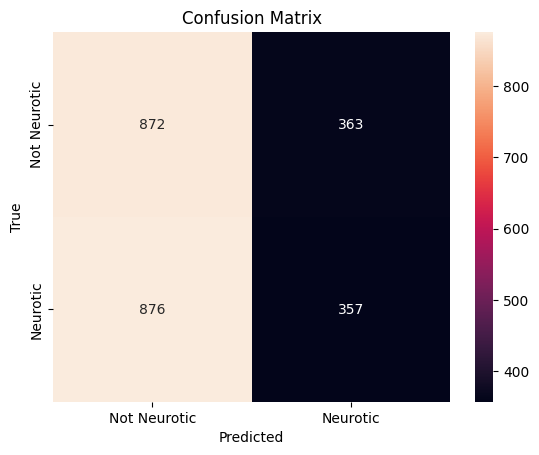

In [ ]:
# Step 2: Define the pipeline with fixed best parameters
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        ngram_range=(1, 1),         # Set ngram_range as (1, 1) (unigrams only)
        stop_words=None,            # No stop words filtering
        min_df=1,                   # Minimum document frequency of 1
        max_df=0.9                  # Maximum document frequency of 0.9
    )),
    ('clf', LinearSVC(class_weight='balanced', C=1.0, max_iter=1000))  # Use LinearSVC with best C value
])

# Step 3: Train the model
pipeline.fit(X_train, y_train)

# Step 4: Evaluate on test set
y_pred = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("LinearSVC Confusion Matrix")
plt.show()

y_pred = grid.best_estimator_.predict(X_eval)
print("Eval Accuracy:", accuracy_score(y_eval, y_pred))
print("Classification Report:")
print(classification_report(y_eval, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# RandomForestClassifier

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'clf__max_depth': None, 'clf__n_estimators': 100, 'vectorizer__max_df': 1.0, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 1)}
Best F1 Score (CV): 0.44965729541244415
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.65      0.93      0.77        30
    Neurotic       0.71      0.25      0.37        20

    accuracy                           0.66        50
   macro avg       0.68      0.59      0.57        50
weighted avg       0.68      0.66      0.61        50



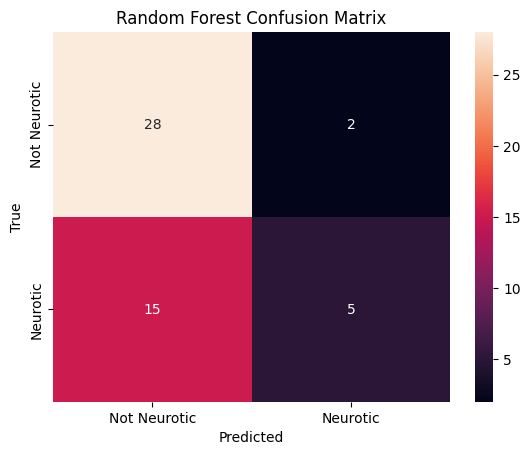

Eval Accuracy: 0.5004051863857374
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.50      0.98      0.66      1235
    Neurotic       0.50      0.02      0.04      1233

    accuracy                           0.50      2468
   macro avg       0.50      0.50      0.35      2468
weighted avg       0.50      0.50      0.35      2468



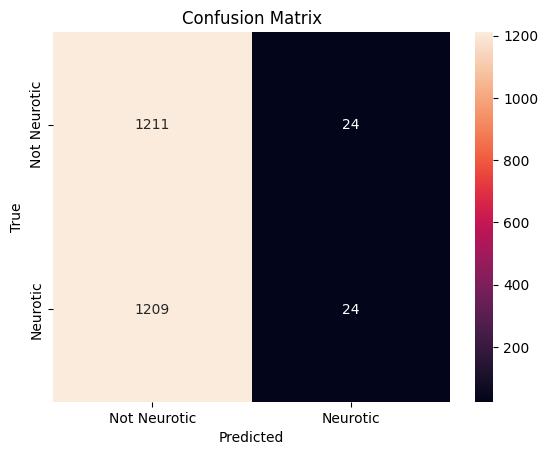

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 1: Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Step 2: Pipeline with CountVectorizer + Random Forest
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Step 3: Parameter grid
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__min_df': [1, 2],
    'vectorizer__max_df': [0.85, 1.0],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 20, 50]
}

# Step 4: Grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Step 5: Evaluate
print("Best Parameters:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)

y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Step 6: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.show()
#--------------------------------------------------------
y_pred = grid.best_estimator_.predict(X_eval)
print("Eval Accuracy:", accuracy_score(y_eval, y_pred))
print("Classification Report:")
print(classification_report(y_eval, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Word2Vec + LogisticRegression

In [ ]:
# Pre-trained Word2Vec model
import gensim.downloader as api

# Load the pre-trained Word2Vec model
word2vec_model = api.load('glove-wiki-gigaword-100')

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.72      0.87      0.79        30
    Neurotic       0.71      0.50      0.59        20

    accuracy                           0.72        50
   macro avg       0.72      0.68      0.69        50
weighted avg       0.72      0.72      0.71        50



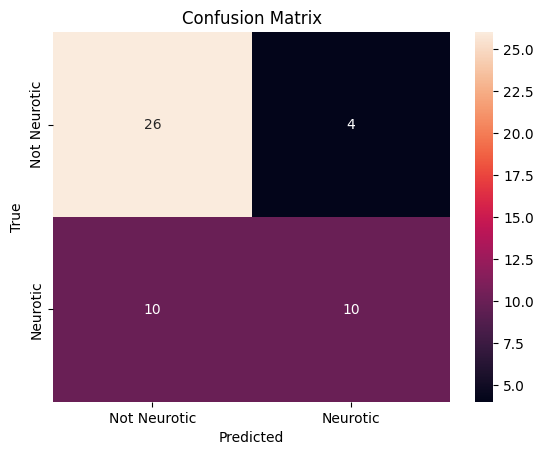

In [ ]:

# Function to get average Word2Vec embeddings for a document
def get_average_word2vec(tokens, model):
    # Get word vectors for all tokens in the document
    word_vectors = [model[token] for token in tokens if token in model]
    # If no valid vectors, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Preprocessing function to tokenize text and get Word2Vec embeddings
def preprocess_text_word2vec(text):
    tokens = text.split()  # Simple tokenization (you can use more advanced methods if necessary)
    return get_average_word2vec(tokens, word2vec_model)

# Preprocess the data by applying Word2Vec
X_train_word2vec = X_train.apply(preprocess_text_word2vec)
X_test_word2vec = X_test.apply(preprocess_text_word2vec)
# Vectorization + Logistic Regression Pipeline

pipeline = make_pipeline(
    LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=500, class_weight='balanced')
)

# Train model on resampled data
pipeline.fit(list(X_train_word2vec), y_train)


# Predict and Evaluate
y_pred = pipeline.predict(list(X_test_word2vec))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.48338735818476497
Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.49      0.85      0.62      1235
    Neurotic       0.44      0.12      0.19      1233

    accuracy                           0.48      2468
   macro avg       0.46      0.48      0.40      2468
weighted avg       0.46      0.48      0.40      2468



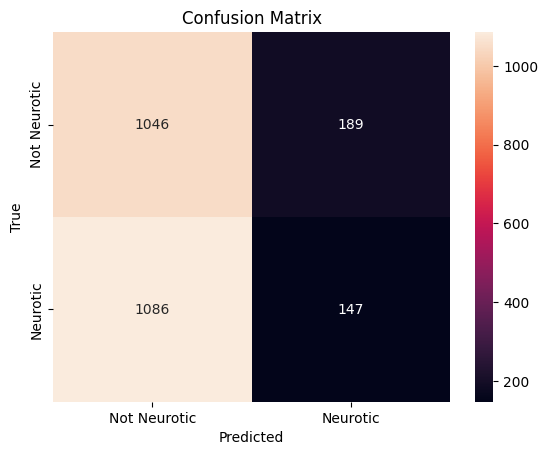

In [ ]:
X_eval_word2vec = X_eval.apply(preprocess_text_word2vec)

y_pred = pipeline.predict(list(X_eval_word2vec))
accuracy = accuracy_score(y_eval, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_eval, y_pred, target_names=["Not Neurotic", "Neurotic"]))

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# BERT

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from datasets import Dataset

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-241-c4518b74c030>:48: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Neurotic,Precision Neurotic,Recall Neurotic
1,0.699800,0.680068,0.600000,0.375000,0.000000,0.000000,0.000000
2,0.666100,0.680263,0.600000,0.375000,0.000000,0.000000,0.000000
3,0.616000,0.683408,0.600000,0.375000,0.000000,0.000000,0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Final Evaluation: {'eval_loss': 0.6834083795547485, 'eval_accuracy': 0.6, 'eval_f1_macro': 0.375, 'eval_f1_neurotic': 0.0, 'eval_precision_neurotic': 0.0, 'eval_recall_neurotic': 0.0, 'eval_runtime': 18.5505, 'eval_samples_per_second': 2.695, 'eval_steps_per_second': 0.054, 'epoch': 3.0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.60      1.00      0.75        30
    Neurotic       0.00      0.00      0.00        20

    accuracy                           0.60        50
   macro avg       0.30      0.50      0.38        50
weighted avg       0.36      0.60      0.45        50



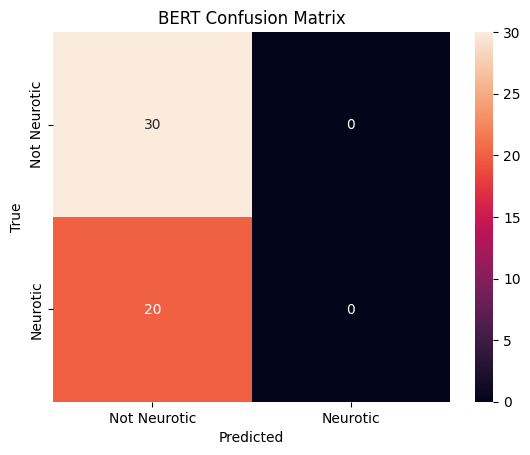

In [ ]:
# *******
train_df, test_df = train_test_split(user_df, stratify=user_df["cNEU"], test_size=0.2, random_state=42)

train_df = train_df.rename(columns={"cNEU": "label"})
test_df = test_df.rename(columns={"cNEU": "label"})
# Step 2: Tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

def tokenize(batch):
    return tokenizer(batch["STATUS"], truncation=True, padding=True, max_length=128)


train_dataset = Dataset.from_pandas(train_df[["STATUS", "label"]])
test_dataset = Dataset.from_pandas(test_df[["STATUS", "label"]])
train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Step 3: Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Step 4: Training Args
training_args = TrainingArguments(
    output_dir="./bert_results",
    eval_strategy="epoch",
    save_strategy="no",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=False
)

# Step 5: Trainer
def compute_metrics(pred):
    preds = pred.predictions.argmax(-1)
    labels = pred.label_ids
    report = classification_report(labels, preds, output_dict=True)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1_macro': report['macro avg']['f1-score'],
        'f1_neurotic': report['1']['f1-score'],  # label 1 = neurotic
        'precision_neurotic': report['1']['precision'],
        'recall_neurotic': report['1']['recall']
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Step 6: Train
trainer.train()

# Step 7: Evaluate
results = trainer.evaluate()
print(" Final Evaluation:", results)

# Step 8: Predict and print classification report
preds = trainer.predict(test_dataset)
y_pred = preds.predictions.argmax(-1)
y_true = preds.label_ids

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Neurotic", "Neurotic"]))
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
            yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("BERT Confusion Matrix")
plt.show()
#----------------------------------
# eval_dataset = Dataset.from_pandas(test_df[["TEXT", "cNEU":'label']])

# eval_dataset = eval_dataset.map(tokenize, batched=True)

# preds = trainer.predict(eval_dataset)
# y_pred = preds.predictions.argmax(-1)
# y_true = preds.label_ids

# print("\nClassification Report:")
# print(classification_report(y_true, y_pred, target_names=["Not Neurotic", "Neurotic"]))
# # Confusion Matrix
# cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
# sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"],
#             yticklabels=["Not Neurotic", "Neurotic"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("BERT Confusion Matrix")
# plt.show()


# BERT weighted

Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-29-2aa2f562e04c>:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.709300,0.686607,0.600000,0.375000
2,0.671500,0.698524,0.600000,0.375000
3,0.614300,0.747965,0.480000,0.435764
4,0.454700,0.814216,0.540000,0.416540
5,0.354900,0.950599,0.420000,0.390500
6,0.275600,1.014541,0.540000,0.479873
7,0.166500,1.108223,0.500000,0.450549
8,0.144700,1.192630,0.500000,0.415615
9,0.120200,1.234921,0.520000,0.465241
10,0.097500,1.252406,0.500000,0.434645



Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.60      1.00      0.75        30
    Neurotic       0.00      0.00      0.00        20

    accuracy                           0.60        50
   macro avg       0.30      0.50      0.38        50
weighted avg       0.36      0.60      0.45        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.60      1.00      0.75        30
    Neurotic       0.00      0.00      0.00        20

    accuracy                           0.60        50
   macro avg       0.30      0.50      0.38        50
weighted avg       0.36      0.60      0.45        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.56      0.63      0.59        30
    Neurotic       0.31      0.25      0.28        20

    accuracy                           0.48        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.46      0.48      0.47        50


Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.58      0.83      0.68        30
    Neurotic       0.29      0.10      0.15        20

    accuracy                           0.54        50
   macro avg       0.43      0.47      0.42        50
weighted avg       0.46      0.54      0.47        50


Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.52      0.53      0.52        30
    Neurotic       0.26      0.25      0.26        20

    accuracy                           0.42        50
   macro avg       0.39      0.39      0.39        50
we


Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.57      0.70      0.63        30
    Neurotic       0.31      0.20      0.24        20

    accuracy                           0.50        50
   macro avg       0.44      0.45      0.43        50
weighted avg       0.46      0.50      0.47        50


Final Evaluation: {'eval_loss': 1.2524062395095825, 'eval_accuracy': 0.5, 'eval_f1_macro': 0.43464495703301675, 'eval_runtime': 0.1021, 'eval_samples_per_second': 489.499, 'eval_steps_per_second': 9.79, 'epoch': 10.0}

Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.57      0.70      0.63        30
    Neurotic       0.31      0.20      0.24        20

    accuracy                           0.50        50
   macro avg       0.44      0.45      0.43        50
weighted avg       0.46      0.50      0.47        50



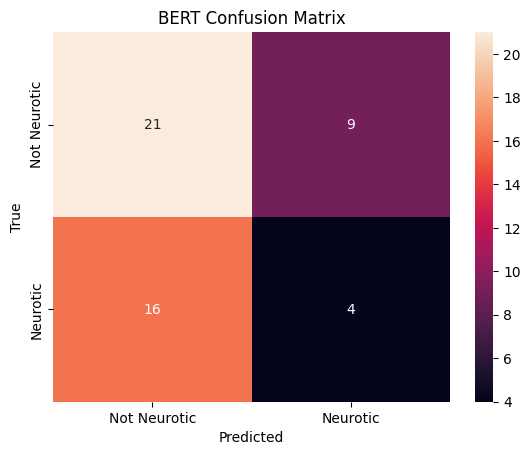

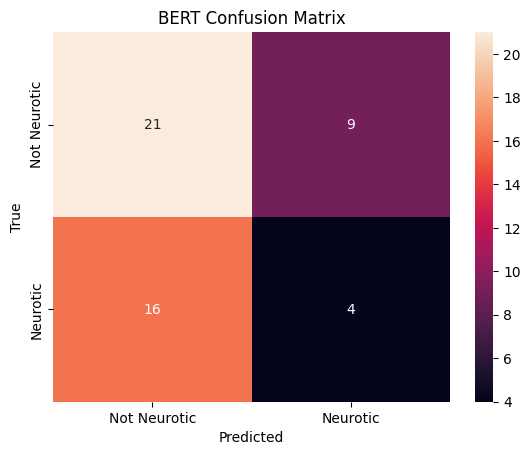


Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.49      0.57      0.53      1235
    Neurotic       0.49      0.41      0.45      1233

    accuracy                           0.49      2468
   macro avg       0.49      0.49      0.49      2468
weighted avg       0.49      0.49      0.49      2468



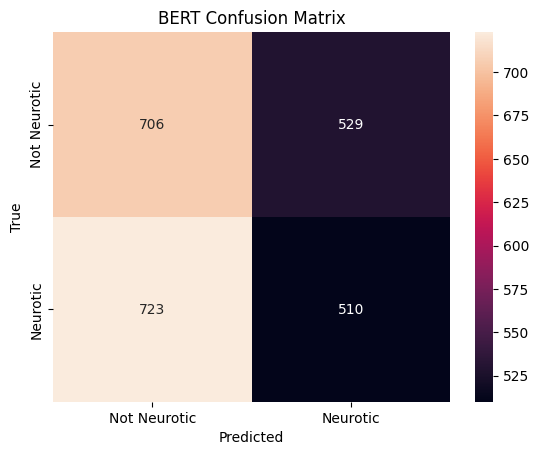

In [ ]:
from torch.nn import CrossEntropyLoss


# Step 1: Prepare data
train_df, test_df = train_test_split(user_df, stratify=user_df["cNEU"], test_size=0.2, random_state=42)
#train_df = train_df.rename(columns={"cNEU": "label"})
#test_df = test_df.rename(columns={"cNEU": "label"})

# Step 2: Tokenization
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
def tokenize(batch):
    return tokenizer(batch["STATUS"], truncation=True, padding=True, max_length=128)

train_dataset = Dataset.from_pandas(train_df[["STATUS", "label"]])
test_dataset = Dataset.from_pandas(test_df[["STATUS", "label"]])
eval_dataset = Dataset.from_pandas(df_test[["STATUS", "label"]])

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)
eval_dataset = eval_dataset.map(tokenize, batched=True)

# Step 3: Class weights
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=train_df['label'])
weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Step 4: Custom model with class weights
class WeightedBERT(BertForSequenceClassification):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fn = CrossEntropyLoss(weight=weights_tensor.to(logits.device))
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss
model = WeightedBERT.from_pretrained('bert-base-uncased', num_labels=2).to(device)
weights_tensor = weights_tensor.to(device)

# Step 5: TrainingArguments
training_args = TrainingArguments(
    output_dir="./bert_results",
    eval_strategy="epoch",
    save_strategy="no",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=False
)

# Step 6: Compute metrics
def compute_metrics(pred):
    y_pred = pred.predictions.argmax(-1)
    y_true = pred.label_ids
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Not Neurotic", "Neurotic"]))
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_macro': classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score']
    }

# Step 7: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Step 8: Train and evaluate
trainer.train()
results = trainer.evaluate()
print("\nFinal Evaluation:", results)

# Step 9: Prediction & Confusion Matrix
preds = trainer.predict(test_dataset)
y_pred = preds.predictions.argmax(-1)
y_true = preds.label_ids

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"], yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("BERT Confusion Matrix")
plt.show()

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"], yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("BERT Confusion Matrix")
plt.show()

# Step 9: Prediction & Confusion Matrix
preds = trainer.predict(eval_dataset)
y_pred = preds.predictions.argmax(-1)
y_true = preds.label_ids

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"], yticklabels=["Not Neurotic", "Neurotic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("BERT Confusion Matrix")
plt.show()


# BERT With OPTUNA CROSS ENTROPY LOSS

<ipython-input-36-1705991c309e>:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-19 19:19:52,565] A new study created in memory with name: no-name-ff6757d3-f6b8-45e5-a8fd-10e82aeedc52
Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.689900,0.673439,0.600000,0.375000
2,0.630800,0.679461,0.600000,0.375000
3,0.620200,0.657685,0.620000,0.463580
4,0.577500,0.663260,0.580000,0.407115
5,0.586300,0.664641,0.600000,0.417249
6,0.566600,0.681293,0.620000,0.518011
7,0.482700,0.726693,0.620000,0.518011
8,0.400100,0.718087,0.500000,0.463749
9,0.385400,0.773227,0.520000,0.448529
10,0.333100,0.786631,0.520000,0.500000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.691800,0.671952,0.600000,0.375000
2,0.600100,0.701173,0.600000,0.375000
3,0.553100,0.785920,0.460000,0.459784
4,0.332200,0.847309,0.620000,0.463580
5,0.307200,0.961147,0.560000,0.509804
6,0.077200,1.378337,0.520000,0.507389
7,0.014600,2.019065,0.560000,0.541667
8,0.004200,2.421641,0.560000,0.541667
9,0.002400,2.660996,0.520000,0.507389
10,0.001900,2.710151,0.520000,0.507389


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.714500,0.680184,0.580000,0.367089
2,0.541200,0.760150,0.600000,0.451754
3,0.305200,1.075706,0.420000,0.417904
4,0.156600,1.634196,0.440000,0.405772
5,0.072700,2.428912,0.420000,0.419768
6,0.005900,2.624648,0.480000,0.448217
7,0.038900,3.173616,0.460000,0.389417
8,0.003600,3.327301,0.500000,0.474569
9,0.001200,3.016611,0.560000,0.396930
10,0.008300,3.536506,0.460000,0.432535


[I 2025-05-19 19:21:23,100] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 3.981747230688906e-05, 'num_train_epochs': 20, 'per_device_train_batch_size': 8, 'weight_decay': 0.11004641805206927}. Best is trial 0 with value: 0.0.
Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.698900,0.673349,0.600000,0.375000
2,0.591300,0.717026,0.580000,0.367089
3,0.480400,0.693113,0.580000,0.571603
4,0.303800,0.947694,0.580000,0.407115
5,0.147200,1.339144,0.500000,0.450549
6,0.028800,1.903502,0.500000,0.483258
7,0.004000,2.233768,0.500000,0.463749
8,0.002400,2.591148,0.460000,0.441918
9,0.001600,2.565888,0.500000,0.450549
10,0.001200,2.690148,0.500000,0.474569


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-19 19:21:55,918] Trial 3 finished with

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.692600,0.694104,0.540000,0.539816
2,0.683000,0.683226,0.600000,0.451754
3,0.674600,0.676358,0.600000,0.417249
4,0.634600,0.673165,0.580000,0.367089
5,0.663000,0.670055,0.580000,0.367089
6,0.677000,0.666361,0.580000,0.367089
7,0.631200,0.663777,0.580000,0.367089
8,0.657100,0.667321,0.600000,0.375000
9,0.646800,0.668387,0.580000,0.367089
10,0.640500,0.665156,0.580000,0.367089


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-19 19:22:20,444] Trial 4 finished with

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.705500,0.673816,0.600000,0.375000
2,0.676300,0.684990,0.600000,0.375000
3,0.596600,0.704547,0.580000,0.525102
4,0.449000,0.812659,0.560000,0.494485
5,0.261100,1.067268,0.560000,0.476190
6,0.136300,1.326301,0.560000,0.533107
7,0.035500,1.759034,0.580000,0.525102
8,0.008900,2.067206,0.560000,0.533107
9,0.005800,2.184899,0.580000,0.549550
10,0.001800,2.221889,0.600000,0.540441


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.693100,0.681164,0.580000,0.367089
2,0.682300,0.672281,0.600000,0.375000
3,0.640200,0.670865,0.600000,0.375000
4,0.650000,0.674116,0.600000,0.375000
5,0.634000,0.677151,0.600000,0.375000
6,0.599900,0.685277,0.600000,0.375000
7,0.576300,0.686418,0.580000,0.407115
8,0.559600,0.705247,0.580000,0.407115
9,0.505100,0.705174,0.620000,0.538611
10,0.472200,0.722296,0.620000,0.538611


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.721600,0.689965,0.560000,0.358974
2,0.557100,0.748217,0.580000,0.407115
3,0.320600,1.217022,0.400000,0.391234
4,0.077600,1.849499,0.460000,0.406593
5,0.123200,2.575652,0.520000,0.465241
6,0.013500,2.676152,0.520000,0.448529
7,0.001500,3.105569,0.480000,0.420677
8,0.001100,3.369916,0.460000,0.406593
9,0.000600,3.013644,0.560000,0.454365
10,0.000500,3.608391,0.420000,0.390500


[I 2025-05-19 19:23:41,040] Trial 7 finished with value: 0.0 and parameters: {'learning_rate': 4.4131327632984275e-05, 'num_train_epochs': 20, 'per_device_train_batch_size': 8, 'weight_decay': 0.055843911780733176}. Best is trial 0 with value: 0.0.
Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.697300,0.672630,0.600000,0.375000
2,0.677400,0.677758,0.600000,0.375000
3,0.608500,0.688480,0.600000,0.375000
4,0.560900,0.751713,0.600000,0.375000
5,0.497400,0.760013,0.500000,0.474569
6,0.398800,0.827037,0.500000,0.474569
7,0.243000,0.953719,0.480000,0.458333
8,0.162300,1.042335,0.520000,0.490662
9,0.124400,1.120048,0.580000,0.538462
10,0.071500,1.309295,0.460000,0.449204


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.687400,0.671916,0.600000,0.375000
2,0.634800,0.668954,0.600000,0.375000
3,0.627700,0.663064,0.600000,0.375000
4,0.542100,0.675429,0.600000,0.375000
5,0.564000,0.693015,0.560000,0.428274
6,0.563400,0.688670,0.580000,0.440000
7,0.434100,0.704642,0.640000,0.586397
8,0.391200,0.731991,0.600000,0.554367
9,0.349900,0.731805,0.620000,0.538611
10,0.308800,0.746016,0.640000,0.586397


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.699600,0.676131,0.600000,0.375000
2,0.639700,0.683437,0.600000,0.375000
3,0.624700,0.691137,0.600000,0.375000
4,0.591900,0.720355,0.580000,0.440000
5,0.553000,0.770577,0.460000,0.389417
6,0.432200,0.893394,0.320000,0.310065
7,0.381400,0.857171,0.480000,0.420677
8,0.263600,0.898456,0.420000,0.362637
9,0.244000,1.034526,0.360000,0.333333
10,0.191300,1.036961,0.420000,0.377949


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Test Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.60      0.90      0.72        30
    Neurotic       0.40      0.10      0.16        20

    accuracy                           0.58        50
   macro avg       0.50      0.50      0.44        50
weighted avg       0.52      0.58      0.50        50



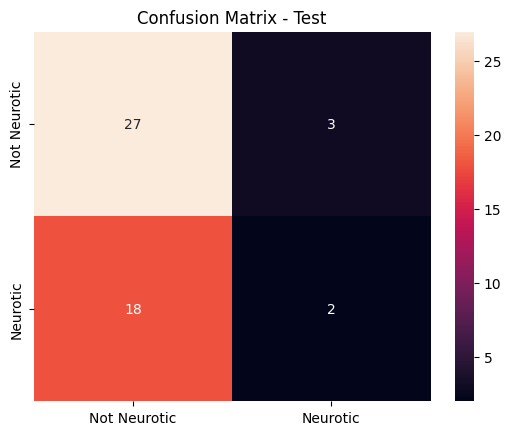


Eval Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.50      0.93      0.65      1235
    Neurotic       0.52      0.08      0.14      1233

    accuracy                           0.50      2468
   macro avg       0.51      0.50      0.39      2468
weighted avg       0.51      0.50      0.39      2468



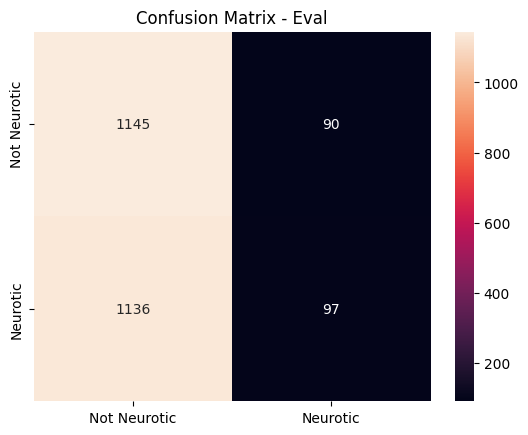

In [ ]:
# 3. Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
weights_tensor = torch.tensor(class_weights, dtype=torch.float)
weights_tensor = weights_tensor.to(device)

# 4. Custom model
from torch.nn import CrossEntropyLoss
class WeightedBERT(BertForSequenceClassification):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fn = CrossEntropyLoss(weight=weights_tensor.to(logits.device))
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss

def model_init():
    return WeightedBERT.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# 5. Metrics
def compute_metrics(pred: EvalPrediction):
    preds = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1_macro': classification_report(labels, preds, output_dict=True)['macro avg']['f1-score']
    }

# 6. Optuna hyperparameter search
training_args = TrainingArguments(
    output_dir="./optuna_bert",
    eval_strategy="epoch",
    save_strategy="no",
    logging_steps=10,
    load_best_model_at_end=False,
    report_to="none"
)

def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-6, 5e-5, log=True),
        "num_train_epochs": trial.suggest_categorical("num_train_epochs", [15,20]),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16]),
        "weight_decay": trial.suggest_float("weight_decay", 0.0, 0.3),
    }

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

best_run = trainer.hyperparameter_search(
    direction="maximize",
    n_trials=10,
    hp_space=optuna_hp_space,
    backend="optuna",
    compute_objective=lambda metrics: metrics.get("f1_macro", 0)
)

# 7. Retrain best model
best_training_args = TrainingArguments(
    output_dir="./bert_best_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    learning_rate=best_run.hyperparameters["learning_rate"],
    per_device_train_batch_size=best_run.hyperparameters["per_device_train_batch_size"],
    per_device_eval_batch_size=64,
    num_train_epochs=best_run.hyperparameters["num_train_epochs"],
    weight_decay=best_run.hyperparameters["weight_decay"],
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    report_to="none"
)

final_trainer = Trainer(
    model=model_init(),
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

final_trainer.train()
final_trainer.save_model("bert_best_model")
tokenizer.save_pretrained("bert_best_model")

# 8. Evaluation on test
test_preds = final_trainer.predict(test_dataset)
test_y_pred = np.argmax(test_preds.predictions, axis=1)
test_y_true = test_preds.label_ids
print("\nTest Classification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=["Not Neurotic", "Neurotic"]))

cm = confusion_matrix(test_y_true, test_y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"], yticklabels=["Not Neurotic", "Neurotic"])
plt.title("Confusion Matrix - Test")
plt.show()

# 9. Evaluation on eval
eval_preds = final_trainer.predict(eval_dataset)
eval_y_pred = np.argmax(eval_preds.predictions, axis=1)
eval_y_true = eval_preds.label_ids
print("\nEval Classification Report:")
print(classification_report(eval_y_true, eval_y_pred, target_names=["Not Neurotic", "Neurotic"]))

cm = confusion_matrix(eval_y_true, eval_y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"], yticklabels=["Not Neurotic", "Neurotic"])
plt.title("Confusion Matrix - Eval")
plt.show()

# Focal Loss BERT OPTUNA

In [ ]:
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = torch.nn.functional.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


<ipython-input-38-4348901c604e>:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-19 19:52:47,136] A new study created in memory with name: no-name-660786fc-d97a-44e1-99c4-4929893a08fe
Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.696400,0.673286,0.600000,0.375000
2,0.678200,0.675949,0.600000,0.375000
3,0.613500,0.687351,0.600000,0.375000
4,0.589200,0.721653,0.600000,0.375000
5,0.528800,0.746930,0.580000,0.440000
6,0.444700,0.789386,0.500000,0.474569
7,0.335100,0.805886,0.600000,0.451754
8,0.283300,0.900777,0.540000,0.506650
9,0.228800,0.956323,0.500000,0.474569
10,0.160800,1.006549,0.420000,0.408405


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.696900,0.672923,0.600000,0.375000
2,0.677900,0.676674,0.600000,0.375000
3,0.611300,0.684726,0.600000,0.375000
4,0.577400,0.723584,0.600000,0.375000
5,0.521200,0.722794,0.620000,0.493333
6,0.430100,0.778864,0.480000,0.448217
7,0.314400,0.831163,0.600000,0.503968
8,0.245300,0.866582,0.520000,0.479167
9,0.202600,0.938220,0.520000,0.490662
10,0.127300,1.042781,0.480000,0.466338


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.690900,0.689408,0.540000,0.494505
2,0.671400,0.676686,0.580000,0.367089
3,0.661300,0.671848,0.600000,0.375000
4,0.619000,0.669464,0.600000,0.375000
5,0.654400,0.670672,0.600000,0.375000
6,0.671800,0.666700,0.600000,0.375000
7,0.619500,0.663640,0.580000,0.367089
8,0.629900,0.668964,0.580000,0.367089
9,0.617000,0.669038,0.580000,0.367089
10,0.586200,0.680710,0.580000,0.490044


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.713900,0.680015,0.580000,0.367089
2,0.545400,0.756715,0.600000,0.417249
3,0.294600,1.093725,0.480000,0.458333
4,0.121100,1.831961,0.620000,0.427366
5,0.119700,2.549895,0.380000,0.367605
6,0.005000,2.399113,0.560000,0.509804
7,0.001600,3.006006,0.500000,0.365804
8,0.014400,3.319363,0.500000,0.463749
9,0.000800,3.412563,0.460000,0.432535
10,0.000500,3.300730,0.540000,0.494505


[I 2025-05-19 19:54:43,295] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 3.948474366102821e-05, 'num_train_epochs': 20, 'per_device_train_batch_size': 8, 'weight_decay': 0.2309810536152696}. Best is trial 0 with value: 0.0.
Some weights of WeightedBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.693300,0.689888,0.540000,0.506650
2,0.689800,0.678845,0.580000,0.367089
3,0.657600,0.673294,0.600000,0.375000
4,0.665000,0.673676,0.600000,0.375000
5,0.655400,0.672317,0.600000,0.375000
6,0.634000,0.669870,0.600000,0.375000
7,0.627800,0.672971,0.600000,0.375000
8,0.640100,0.669782,0.600000,0.375000
9,0.615100,0.675310,0.600000,0.375000
10,0.613800,0.680297,0.600000,0.417249


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.693600,0.665668,0.600000,0.375000
2,0.622000,0.669027,0.600000,0.375000
3,0.626700,0.667072,0.620000,0.538611
4,0.551100,0.678283,0.580000,0.440000
5,0.537400,0.707648,0.640000,0.617997
6,0.441400,0.796250,0.520000,0.519231
7,0.328000,0.760618,0.620000,0.570330
8,0.198500,0.879378,0.560000,0.533107
9,0.123000,1.037367,0.560000,0.509804
10,0.081700,1.161854,0.580000,0.565936


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.690200,0.671587,0.600000,0.375000
2,0.604200,0.696566,0.600000,0.375000
3,0.499500,0.728782,0.560000,0.533107
4,0.310300,0.774236,0.620000,0.463580
5,0.241200,0.938770,0.560000,0.509804
6,0.113000,1.145837,0.560000,0.541667
7,0.021600,1.665702,0.560000,0.509804
8,0.007300,2.141076,0.540000,0.494505
9,0.003500,2.318126,0.500000,0.474569
10,0.003100,2.475673,0.500000,0.490004


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.695200,0.675175,0.600000,0.375000
2,0.679900,0.675324,0.600000,0.375000
3,0.623000,0.675432,0.600000,0.375000
4,0.619900,0.684150,0.600000,0.375000
5,0.588100,0.724366,0.600000,0.417249
6,0.503600,0.726994,0.580000,0.440000
7,0.457200,0.746130,0.580000,0.467275
8,0.417800,0.758875,0.540000,0.494505
9,0.347700,0.815567,0.580000,0.525102
10,0.299000,0.840688,0.560000,0.509804


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.691200,0.690487,0.520000,0.490662
2,0.673500,0.677874,0.580000,0.407115
3,0.663600,0.672730,0.600000,0.375000
4,0.621800,0.669098,0.580000,0.367089
5,0.654600,0.666414,0.600000,0.375000
6,0.672200,0.663006,0.600000,0.375000
7,0.617600,0.663377,0.580000,0.367089
8,0.635300,0.666089,0.580000,0.367089
9,0.617200,0.677034,0.580000,0.367089
10,0.596100,0.677506,0.600000,0.480249


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.694000,0.677080,0.600000,0.375000
2,0.680400,0.672061,0.600000,0.375000
3,0.630300,0.673022,0.600000,0.375000
4,0.636700,0.676545,0.600000,0.375000
5,0.614300,0.688265,0.600000,0.375000
6,0.559200,0.701456,0.600000,0.451754
7,0.531200,0.704050,0.620000,0.518011
8,0.491100,0.713639,0.600000,0.523810
9,0.431900,0.752560,0.580000,0.440000
10,0.395400,0.739913,0.560000,0.509804


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.707100,0.670467,0.600000,0.375000
2,0.665700,0.670591,0.600000,0.375000
3,0.628300,0.672702,0.600000,0.375000
4,0.580500,0.678390,0.600000,0.554367
5,0.518900,0.730644,0.500000,0.499800
6,0.391800,0.724840,0.640000,0.598930
7,0.336600,0.763338,0.620000,0.555867
8,0.266800,0.898623,0.500000,0.499800
9,0.247900,0.919408,0.580000,0.490044
10,0.188600,1.035218,0.460000,0.449204


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Test Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.67      0.80      0.73        30
    Neurotic       0.57      0.40      0.47        20

    accuracy                           0.64        50
   macro avg       0.62      0.60      0.60        50
weighted avg       0.63      0.64      0.62        50



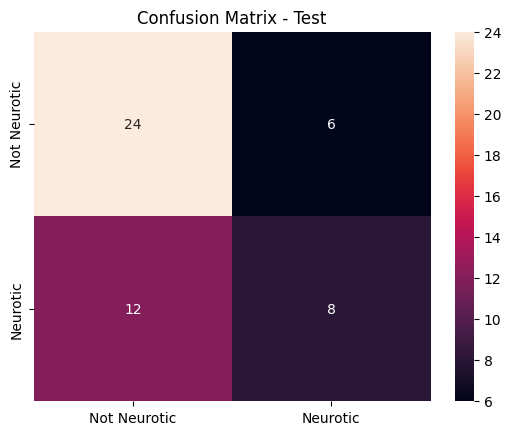


Eval Classification Report:
              precision    recall  f1-score   support

Not Neurotic       0.50      0.77      0.60      1235
    Neurotic       0.50      0.23      0.32      1233

    accuracy                           0.50      2468
   macro avg       0.50      0.50      0.46      2468
weighted avg       0.50      0.50      0.46      2468



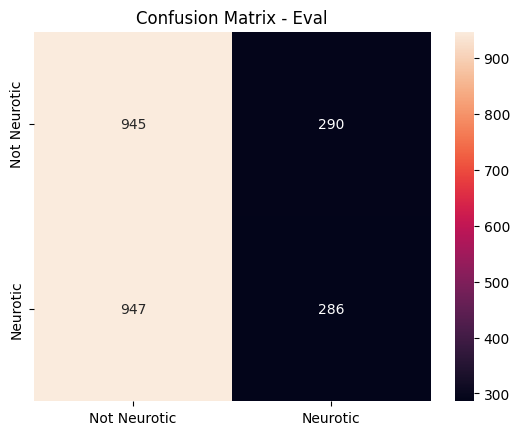

In [ ]:
# 3. Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
weights_tensor = torch.tensor(class_weights, dtype=torch.float)
weights_tensor = weights_tensor.to(device)

# 4. Custom model
#from torch.nn import CrossEntropyLoss
class WeightedBERT(BertForSequenceClassification):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fn = FocalLoss(weight=weights_tensor.to(logits.device))
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss

def model_init():
    return WeightedBERT.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# 5. Metrics
def compute_metrics(pred: EvalPrediction):
    preds = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1_macro': classification_report(labels, preds, output_dict=True)['macro avg']['f1-score']
    }

# 6. Optuna hyperparameter search
training_args = TrainingArguments(
    output_dir="./optuna_bert",
    eval_strategy="epoch",
    save_strategy="no",
    logging_steps=10,
    load_best_model_at_end=False,
    report_to="none"
)

def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-6, 5e-5, log=True),
        "num_train_epochs": trial.suggest_categorical("num_train_epochs", [15,20]),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16]),
        "weight_decay": trial.suggest_float("weight_decay", 0.0, 0.3),
    }

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

best_run = trainer.hyperparameter_search(
    direction="maximize",
    n_trials=10,
    hp_space=optuna_hp_space,
    backend="optuna",
    compute_objective=lambda metrics: metrics.get("f1_macro", 0)
)

# 7. Retrain best model
best_training_args = TrainingArguments(
    output_dir="./bert_best_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    learning_rate=best_run.hyperparameters["learning_rate"],
    per_device_train_batch_size=best_run.hyperparameters["per_device_train_batch_size"],
    per_device_eval_batch_size=64,
    num_train_epochs=best_run.hyperparameters["num_train_epochs"],
    weight_decay=best_run.hyperparameters["weight_decay"],
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    report_to="none"
)

final_trainer = Trainer(
    model=model_init(),
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

final_trainer.train()
final_trainer.save_model("bert_best_model")
tokenizer.save_pretrained("bert_best_model")

# 8. Evaluation on test
test_preds = final_trainer.predict(test_dataset)
test_y_pred = np.argmax(test_preds.predictions, axis=1)
test_y_true = test_preds.label_ids
print("\nTest Classification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=["Not Neurotic", "Neurotic"]))

cm = confusion_matrix(test_y_true, test_y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"], yticklabels=["Not Neurotic", "Neurotic"])
plt.title("Confusion Matrix - Test")
plt.show()

# 9. Evaluation on eval
eval_preds = final_trainer.predict(eval_dataset)
eval_y_pred = np.argmax(eval_preds.predictions, axis=1)
eval_y_true = eval_preds.label_ids
print("\nEval Classification Report:")
print(classification_report(eval_y_true, eval_y_pred, target_names=["Not Neurotic", "Neurotic"]))

cm = confusion_matrix(eval_y_true, eval_y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Neurotic", "Neurotic"], yticklabels=["Not Neurotic", "Neurotic"])
plt.title("Confusion Matrix - Eval")
plt.show()